In [4]:
# load dataset
import pandas as pd
data = pd.read_csv('Customers.csv')
data.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
133,134,Female,31,72,71
13,14,Female,24,20,77
166,167,Male,42,86,20
36,37,Female,42,34,17
108,109,Male,68,63,43


In [5]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]

# rename names of columns for simplicity
data = data.rename(columns={'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'score'})

data.sample(5)

,income,score
66,48,50
174,88,13
160,79,35
88,58,60
63,47,59


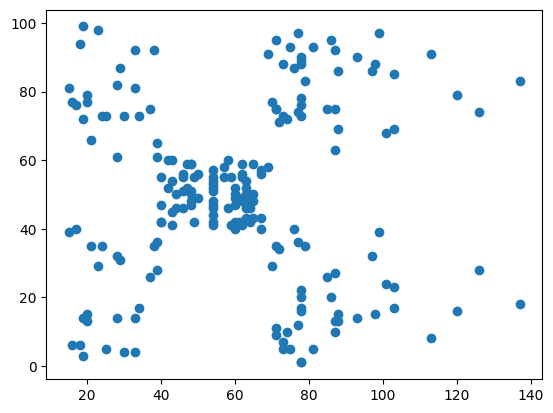

In [6]:
# visualize the data distribution
import matplotlib.pyplot as plt
plt.scatter(data['income'],data['score'])

In [7]:
# calculate sum of squares errors for different K values
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data[['income','score']])
    wcss_error.append(model.inertia_)

In [8]:
# sum of squares error for K=1 to k=10
wcss_error

[269981.28,
 184609.98434090626,
 106348.37306211122,
 73880.64496247195,
 66465.14810226468,
 38858.959975143895,
 32205.07524762059,
 28414.228348686203,
 21818.114588452176,
 20783.544372294375]

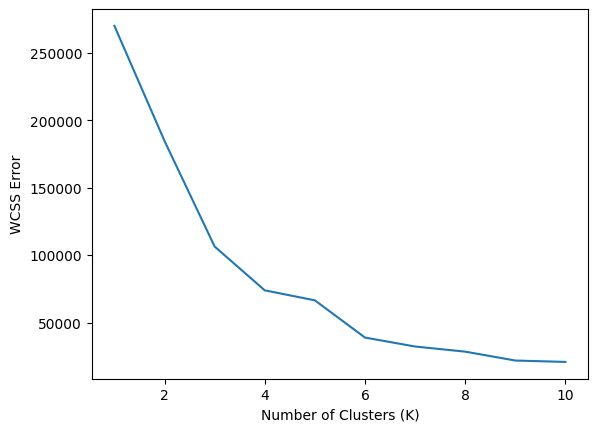

In [9]:
# plot WCSS error corresponding to different K values
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS Error')
plt.plot(k_values, wcss_error)

In [10]:
# train model using k=5
model = KMeans(n_clusters=5)
pred = model.fit_predict(data[['income','score']])

In [11]:
# see predicted clusters
pred

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [12]:
# add cluster column to dataset
data['cluster'] = pred

In [13]:
data.sample(5)

,income,score,cluster
16,21,35,2
64,48,51,2
136,73,7,4
157,78,78,3
123,69,91,3


In [14]:
# centers of clusters
model.cluster_centers_

array([[ 25.72727273,  79.36363636],
       [109.7       ,  22.        ],
       [ 48.16831683,  43.3960396 ],
       [ 86.53846154,  82.12820513],
       [ 78.89285714,  17.42857143]])

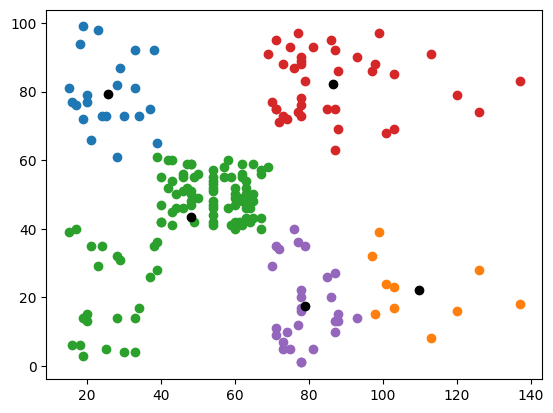

In [15]:
# visualize clusted data

cluster1 = data[data['cluster']==0]
plt.scatter(cluster1['income'], cluster1['score'])

cluster2 = data[data['cluster']==1]
plt.scatter(cluster2['income'], cluster2['score'])

cluster3 = data[data['cluster']==2]
plt.scatter(cluster3['income'], cluster3['score'])

cluster2 = data[data['cluster']==3]
plt.scatter(cluster2['income'], cluster2['score'])

cluster3 = data[data['cluster']==4]
plt.scatter(cluster3['income'], cluster3['score'])

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')

In [16]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Score
sil_score = silhouette_score(data[['income', 'score']], data['cluster'])
print(f"Silhouette Score: {sil_score}")

# Compute Inertia (already available from the fitted model)
inertia = model.inertia_
print(f"Inertia: {inertia}")

Silhouette Score: 0.4622576127652011
Inertia: 66733.43857149451
